In [1]:
##载入模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline   
#将图片在页面中展示

In [10]:
#载入数据
data=pd.read_csv('E:/pydata/20181228_dataloan_model/20181228_dataloan_model.csv',encoding='gbk')
data.head(5)

,transport_id_bas,MobDr1to4_od30,MobDr1to6_od30,MobDr1to6_od10,MobDr1to6_od15,num,month_decision,amt_decision_w,amt_loan_w,dataloan_channel,...,com_quota,limit_before_loan,limit_debt,limit_after_loan,created,software,software_quota2,ccrc_income,ibs_income,comprehensive_income
0,192104,0,0,0,0,1,2017-06,20.0,5.1011,管家婆,...,0.0,0.0,0.0,0.0,2018/4/19 16:49,pgjp,254337.14580,91295.55729,1630.348286,0.0
1,191771,0,0,0,0,1,2017-06,20.0,20.0000,管家婆,...,0.0,0.0,0.0,0.0,2018/4/19 16:49,pgjp,211321.92250,120000.00000,42.857143,0.0
2,191766,0,0,0,0,1,2017-06,18.8,18.8000,管家婆,...,0.0,0.0,0.0,0.0,2018/4/19 16:49,pgjp,255955.29560,60000.00000,0.000000,0.0
3,191565,0,0,0,0,1,2017-06,8.5,8.5000,管家婆,...,0.0,0.0,0.0,0.0,2018/4/19 16:49,pgjp,74958.35728,96000.00000,891.428571,0.0
4,190917,0,0,0,0,1,2017-06,7.9,3.3328,管家婆,...,0.0,0.0,0.0,0.0,2018/4/19 16:49,pgjp,71034.99227,58800.00000,664.092857,0.0


In [11]:
data.columns

Index(['transport_id_bas', 'MobDr1to4_od30', 'MobDr1to6_od30',
       'MobDr1to6_od10', 'MobDr1to6_od15', 'num', 'month_decision',
       'amt_decision_w', 'amt_loan_w', 'dataloan_channel', 'age', 'id',
       'transport_id', 'platform', 'income', 'debt', 'amountCents', 'risk',
       'totalGMVAYear', 'costAYear', 'feesAyear', 'month', 'debtAYear',
       'grossProfit', 'grossRate', 'netProfit', 'actualNetProfit',
       'netProfitAfterCAP', 'beforeRiskamt', 'riskScore', 'afterRiskAmt',
       'software_quota', 'ccrc_quota', 'bankflow_quota', 'com_quota',
       'limit_before_loan', 'limit_debt', 'limit_after_loan', 'created',
       'software', 'software_quota2', 'ccrc_income', 'ibs_income',
       'comprehensive_income'],
      dtype='object')

In [3]:
data['target']=data['MobDr1to6_od30']

In [4]:
a=data['target']
a.value_counts()

0    1679
1      76
Name: target, dtype: int64

In [5]:
data.isnull().sum()

transport_id_bas           0
MobDr1to4_od30             0
MobDr1to6_od30             0
MobDr1to6_od10             0
MobDr1to6_od15             0
num                        0
month_decision             0
amt_decision_w             0
amt_loan_w                 8
dataloan_channel           0
age                        0
id                       438
transport_id             438
platform                 438
income                   438
debt                     438
amountCents              438
risk                     438
totalGMVAYear            438
costAYear                438
feesAyear                438
month                    438
debtAYear                438
grossProfit              438
grossRate                438
netProfit                438
actualNetProfit          438
netProfitAfterCAP        438
beforeRiskamt            438
riskScore                438
afterRiskAmt             438
software_quota           476
ccrc_quota               476
bankflow_quota           476
com_quota     

In [6]:
data.columns

Index(['transport_id_bas', 'MobDr1to4_od30', 'MobDr1to6_od30',
       'MobDr1to6_od10', 'MobDr1to6_od15', 'num', 'month_decision',
       'amt_decision_w', 'amt_loan_w', 'dataloan_channel', 'age', 'id',
       'transport_id', 'platform', 'income', 'debt', 'amountCents', 'risk',
       'totalGMVAYear', 'costAYear', 'feesAyear', 'month', 'debtAYear',
       'grossProfit', 'grossRate', 'netProfit', 'actualNetProfit',
       'netProfitAfterCAP', 'beforeRiskamt', 'riskScore', 'afterRiskAmt',
       'software_quota', 'ccrc_quota', 'bankflow_quota', 'com_quota',
       'limit_before_loan', 'limit_debt', 'limit_after_loan', 'created',
       'software', 'software_quota2', 'ccrc_income', 'ibs_income',
       'comprehensive_income', 'target'],
      dtype='object')

In [7]:
from scipy import stats

def woe_single(DF,Y,X):
    if X.nunique()>11:
        r = 0
        bad=Y.sum()      #坏客户数(假设因变量列为1的是坏客户)
        good=Y.count()-bad  #好客户数
        n=5
        while np.abs(r) < 1:
            d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n,duplicates='drop')})
            d2 = d1.groupby('Bucket', as_index = False)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1
        d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
        d3['min']=d2.min().X    
        d3['max'] = d2.max().X
        d3['sum'] = d2.sum().Y
        d3['total'] = d2.count().Y
        d3['bad_rate'] = d2.mean().Y
        d3['group_rate']=d3['total']/(bad+good)
        d3['woe']=np.log((d3['bad_rate']/(1-d3['bad_rate']))/(bad/good))
        d3['iv']=(d3['sum']/bad-((d3['total']-d3['sum'])/good))*d3['woe']
        iv=d3['iv'].sum()
        if iv!=0.0 and len(d2)>1:
            d3['iv_sum']=iv
            woe=list(d3['woe'].round(6))
            cut=list(d3['min'].round(6))
            cut1=list(d3['max'].round(6))
            cut.append(cut1[-1]+1)
            x_woe=pd.cut(X,cut,right=False,labels=woe)
            return(iv,cut)
            #print(d3,'\ncut:\n',cut,'\nwoe:\n',woe,'\niv:\n',iv,'\nx_woe:\n',x_woe)
        else:
            dn1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.cut(X, 100)})
            dn2 = dn1.groupby('Bucket', as_index = False)
            dn3 = pd.DataFrame(dn2.X.min(), columns = ['min'])
            dn3['min']=dn2.min().X    
            dn3['max'] = dn2.max().X
            dn3['sum'] = dn2.sum().Y
            dn3['total'] = dn2.count().Y
            while (1):
                    if  (len(dn3)>4):
                        dn3_min_index = dn3[dn3.total == min(dn3.total)].index.values[0]
                        if (dn3_min_index!=0):    #最小值非第一行的情况
                            dn3.iloc[dn3_min_index-1, 1] =dn3.iloc[dn3_min_index, 1] 
                            dn3.iloc[dn3_min_index-1, 2] = dn3.iloc[dn3_min_index, 2] +dn3.iloc[dn3_min_index-1, 2]
                            dn3.iloc[dn3_min_index-1, 3] = dn3.iloc[dn3_min_index, 3] +dn3.iloc[dn3_min_index-1, 3]
                            dn3=dn3.drop([dn3_min_index])
                            dn3= dn3.reset_index(drop=True)
                        else:    #最小值是第一行的情况
                            dn3.iloc[dn3_min_index+1, 0] =dn3.iloc[dn3_min_index, 0] 
                            dn3.iloc[dn3_min_index+1, 2] = dn3.iloc[dn3_min_index, 2] +dn3.iloc[dn3_min_index+1, 2]
                            dn3.iloc[dn3_min_index+1, 3] = dn3.iloc[dn3_min_index, 3] +dn3.iloc[dn3_min_index+1, 3]
                            dn3=dn3.drop([dn3_min_index])
                            dn3= dn3.reset_index(drop=True)
                    else:
                        break
            dn3['bad_rate'] =dn3['sum']/dn3['total']
            dn3['group_rate']=dn3['total']/(bad+good)
            dn3['woe']=np.log((dn3['bad_rate']/(1-dn3['bad_rate']))/(bad/good))
            dn3['iv']=(dn3['sum']/bad-((dn3['total']-dn3['sum'])/good))*dn3['woe']
            
            iv=dn3['iv'].sum()
            dn3['iv_sum']=iv
            woe=list(dn3['woe'].round(6)) 
            cut=list(dn3['min'].round(6))
            cut1=list(dn3['max'].round(6))
            cut.append(cut1[-1]+1)
            x_woe=pd.cut(X,cut,right=False,labels=woe)
            return(iv,cut)
            #print(dn3,'\ncut\n',cut,'\nwoe\n',woe,'\niv\n',iv,'\nx_woe\n',x_woe)
    else : 
        bad=Y.sum()      #坏客户数
        good=Y.count()-bad  #好客户数
        d1 = pd.DataFrame({"X": X, "Y": Y})
        d2 = d1.groupby('X', as_index =True)
        d3 = pd.DataFrame()
        
        d3['sum'] = d2.sum().Y
        d3['total'] = d2.count().Y
        for c in range(d3.shape[0])[::-1]:
            if ((d3.iloc[c,1]-d3.iloc[c,0])==0) or (d3.iloc[c,0]==0):
                d3.iloc[c-1,0]=d3.iloc[c-1,0]+d3.iloc[c,0]
                d3.iloc[c-1,1]=d3.iloc[c-1,1]+d3.iloc[c,1]
                d3.drop(d3.index[c],inplace=True)
            else:
                continue
        
        d3['min']=d3.index  
        d3['max'] = d3.index
        d3['bad_rate'] =d3['sum']/d3['total']
        d3['group_rate']=d3['total']/(bad+good)
        d3['woe']=np.log((d3['bad_rate']/(1-d3['bad_rate']))/(bad/good))
        d3['iv']=(d3['sum']/bad-((d3['total']-d3['sum'])/good))*d3['woe']
        iv=d3['iv'].sum()
        d3['iv_sum']=iv
        d3=d3[['min','max','sum','total','bad_rate','group_rate','woe','iv','iv_sum']]
        
        
        woe=list(d3['woe'].round(6))
        cut=list(d3.index)
        x_woe=X.replace(cut,woe)
        return(iv,cut)
        #print(d3,'cut:\n',cut,'woe:\n',woe,'iv:\n',iv,'x_woe:\n',x_woe)

In [9]:
data.columns

Index(['transport_id_bas', 'MobDr1to4_od30', 'MobDr1to6_od30',
       'MobDr1to6_od10', 'MobDr1to6_od15', 'num', 'month_decision',
       'amt_decision_w', 'amt_loan_w', 'dataloan_channel', 'age', 'id',
       'transport_id', 'platform', 'income', 'debt', 'amountCents', 'risk',
       'totalGMVAYear', 'costAYear', 'feesAyear', 'month', 'debtAYear',
       'grossProfit', 'grossRate', 'netProfit', 'actualNetProfit',
       'netProfitAfterCAP', 'beforeRiskamt', 'riskScore', 'afterRiskAmt',
       'software_quota', 'ccrc_quota', 'bankflow_quota', 'com_quota',
       'limit_before_loan', 'limit_debt', 'limit_after_loan', 'created',
       'software', 'software_quota2', 'ccrc_income', 'ibs_income',
       'comprehensive_income', 'target'],
      dtype='object')

In [17]:
#col_list=['risk','riskScore','bankflow_quota','grossProfit','netProfit','ccrc_quota','income','debtAYear','afterRiskAmt']
       #[ 'age', 'income', 'debt', 'risk','totalGMVAYear', 'costAYear', 'feesAyear', 'debtAYear',
       #'grossProfit', 'grossRate', 'netProfit', 'actualNetProfit','beforeRiskamt', 'riskScore', 'afterRiskAmt']    #'netProfitAfterCAP'
       #'software_quota', 'ccrc_quota', 'bankflow_quota', 'com_quota','limit_before_loan', 'limit_debt', 'limit_after_loan','software', 'software_quota2', 'ccrc_income', 'ibs_income',
       #'comprehensive_income']
#woe_single(dat,dat['flag_bad'],dat['AS_dispute_me'])

col_list=['risk','bankflow_quota','grossProfit','netProfit','ccrc_quota','income','debtAYear','afterRiskAmt']
dat=data
dat['target']=dat['MobDr1to6_od10']
name=[]
iv=[]
cut=[]
count=[]
for i in col_list:
    name.append(i)
    iv.append(woe_single(dat,dat['target'],dat[i])[0])
    cut.append(woe_single(dat,dat['target'],dat[i])[1])
    count.append(len(woe_single(dat,dat['target'],dat[i])[1]))
iv_summary=pd.DataFrame({'name':name,'iv':iv,'cut':cut,'cnt':count})
iv_summary=iv_summary[['iv','name','cut','cnt']]
iv_summary.sort_values('iv',ascending=False)

,iv,name,cut,cnt
7,0.099306,afterRiskAmt,"[0.0, 92187.97927, 285917.8794, 9005847.729]",4
2,0.084804,grossProfit,"[-73891385.46, 18247.58263, 54098.58688, 12841...",5
3,0.084804,netProfit,"[-36945692.73, 9123.791314, 27049.29344, 64206...",5
0,0.072771,risk,"[0.0, 0.881221, 0.950478, 0.970344, 1.990068]",5
5,0.069383,income,"[0.0, 73110.77543, 162234.791, 345476.0109, 80...",5
6,0.043664,debtAYear,"[0.0, 96987.28229, 193561.9928, 386943.2252, 4...",5
4,0.019243,ccrc_quota,"[0.0, 123709.9049, 303504.0, 1470926.0]",4
1,0.016904,bankflow_quota,"[0.0, 42618.18171, 167479.9991, 5172253.942]",4


In [18]:
# 等频分箱
def cut_go(dat,string,n):
    cutBox=dat
    cutBox=cutBox.sort_values(string)
    cutBox=cutBox.set_index(np.arange(1,len(cutBox[string])+1,1))
    
    sid=list(np.arange(1,len(cutBox[string])+1,(len(cutBox[string]))/n))
    sid[0]=-1
    sid.append(len(cutBox[string])+1)
    cutBox['cut']=pd.cut(cutBox.index,sid)
    
    return cutBox

In [19]:
# 等分画图
def go_pic(dat,obj,n):
    cut_obj=obj #替换字段#

    dat1=dat[[cut_obj,'flag_bad']]

    dat2=cut_go(dat1,cut_obj,n)
    dat2['num']=1
    dat2=dat2.sort_values(cut_obj)

    dat3=dat2.groupby('cut',as_index=False).agg({'flag_bad':sum,cut_obj:max,'num':sum})
    dat3['bad_rate']=dat3['flag_bad']/dat3['num']
    dat3=dat3.sort_values(cut_obj)

    cut_max=[]
    for i in np.arange(len(dat3[cut_obj])):
        cut_max.append(str(i)+'~~<='+str(round(dat3[cut_obj][i],2)))

    dat3['cut_max']=cut_max


    ## 可视化展示
    dat_plot=dat3

    dat_plot['X']=dat_plot['cut_max']
    dat_plot['Y']=dat_plot['bad_rate']
    dat_plot['Y2']=dat_plot['num']

    fig=plt.figure(figsize=(12,5))
    ax1=fig.add_subplot(1,1,1)
    ax1.bar(dat_plot['X'],dat_plot['Y2'],color='skyblue')
    #ax1.bar(dat_plot.X,dat_plot.Y3,color='b',bottom=dat_plot.Y)
    #ax1.set_ylim(0,30)
    ax1.set_ylabel('cnt',size=15)
    plt.xticks(rotation=45)

    ax2=ax1.twinx()
    ax2.plot(dat_plot['X'],dat_plot['Y'],'-',color='r')
    #ax2.set_ylim(0,1)
    ax2.set_ylabel(u'$rate$',size=15)
    plt.xticks(rotation=45)
    
    plt.title(cut_obj,size=20)

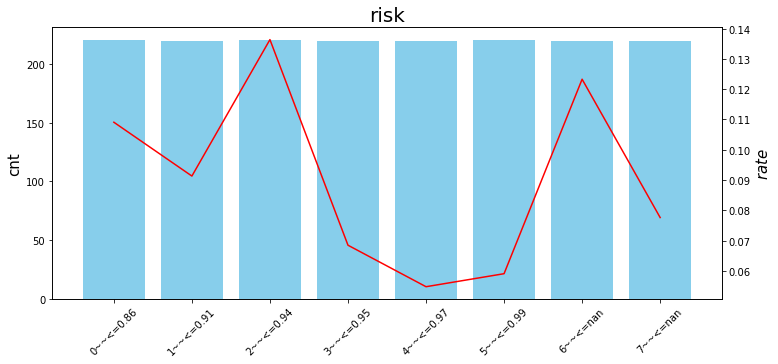

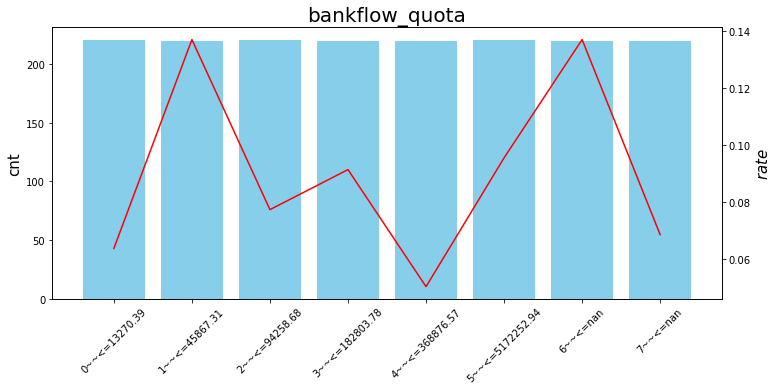

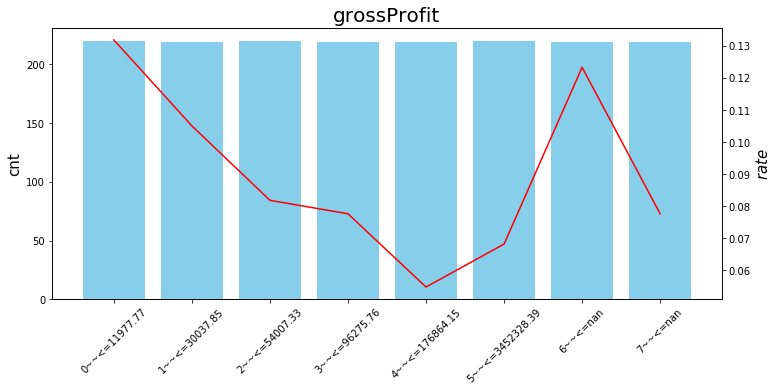

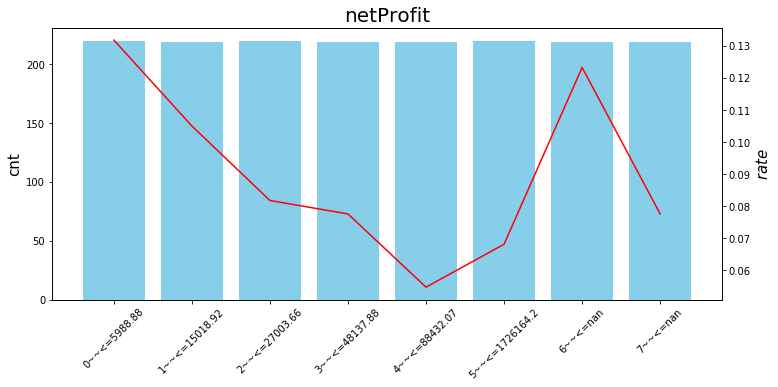

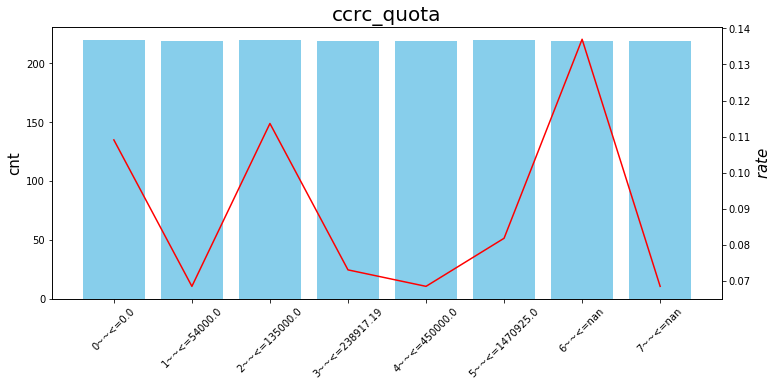

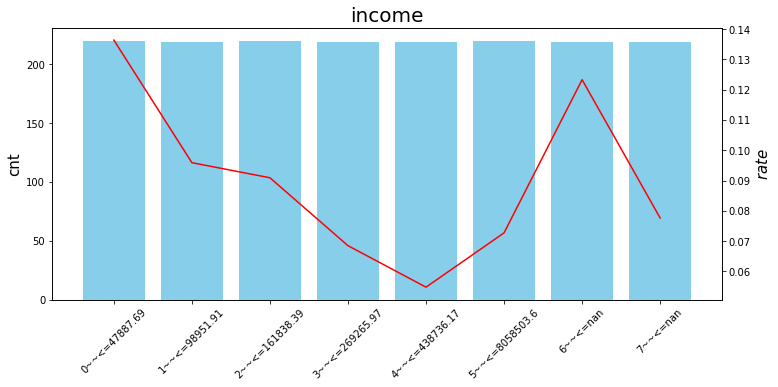

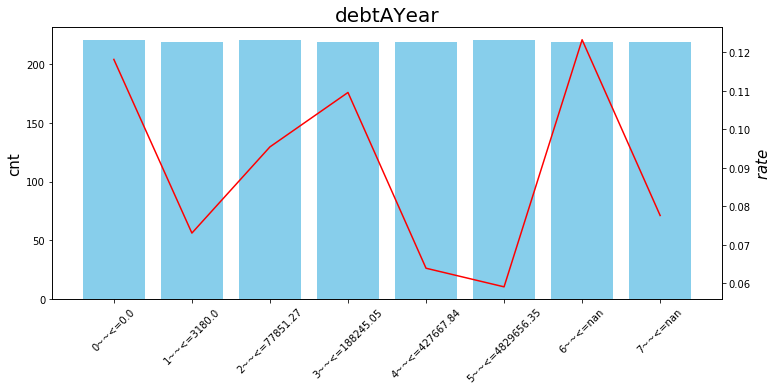

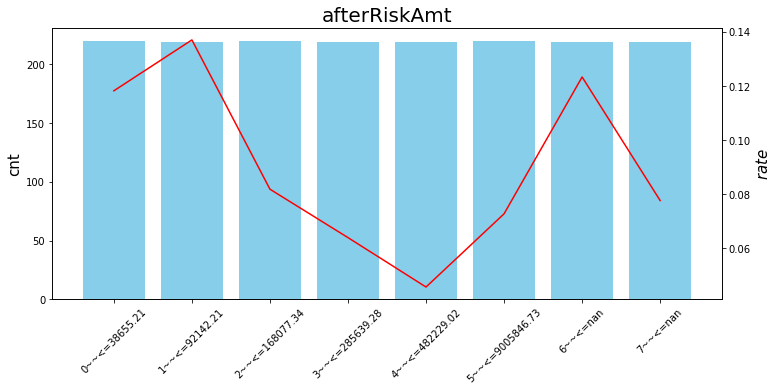

In [23]:
dat=data
dat['flag_bad']=dat['MobDr1to6_od10']
for i in col_list:
    go_pic(dat,i,8)